# MMAE 550 Homework set 2

# Jay Steinberg

# A20487094

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

# Q1: Aircraft has access to two VORs (A,B)

Prior estimated position x_bar [km]: 
 [[20]
 [20]]

Prior covariance matrix [km^2]: 
 [[100   0]
 [  0 100]]

Prior angles theta_A, theta_B [radians]: 
 [[0.78539816]
 [0.        ]]

Part A: Post-Measurement

x_hat (post-measurement estimate) [km]:
 [[20.48867687]
 [19.65107188]]

P_hat (covariance matrix) [km^2]:
 [[0.01096382 0.01095902]
 [0.01095902 0.05479989]]

Part B: Covariance ellipse

Two sigma, axes of ellipse:
For theta_A:  0.18304917698669584 
For theta_B: 0.47911150717213874

Eigenvectors of covariance (ellipse axis directions): 
 [[-0.97324899 -0.22975292]
 [ 0.22975292 -0.97324899]]


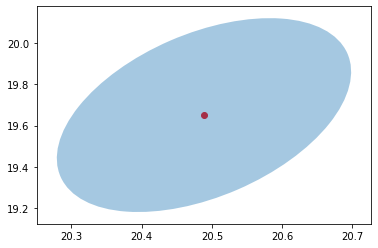

Adjusting x, y plot limits to show origin somehow deletes the ellipse 
so the plot is left with automatic axis limits


In [28]:
# VOR locations
loc_A = np.array([0, 0]).T # km
loc_B = np.array([0, 20]).T # km

# pre-measurement knowledge
x1bar = 20 # km E 
x2bar = 20 # km N 

x1vA = 0 # VOR A, E coord
x2vA = 0 # VOR A, N coord
x1vB = 20 # VOR B, E coord
x2vB = 0 # VOR B, N coord

x_bar = np.array([[x1bar, x2bar]]).T # prior knowledge location
print("Prior estimated position x_bar [km]: \n", x_bar)

sig_x1_2 = 10**2 # prior E variance, assume very large
sig_x2_2 = 10**2 # prior N variance, assume very large
P_bar = np.array([[sig_x1_2, 0],
                  [0, sig_x2_2]]) # prior covariance matrix
print("\nPrior covariance matrix [km^2]: \n", P_bar)

x1_star = x1bar # set guess at prior
x2_star = x2bar # set guess at prior
x_star = np.array([[x1_star, x2_star]]).T # guess vector

theta_A = np.arctan((x1_star-x1vA)/(x2_star-x2vA)) # original angle in radians
theta_B = np.arctan((x1_star-x1vB)/(x2_star-x2vB)) # original angle in radians
h_x_star = np.array([[theta_A, theta_B]]).T
print("\nPrior angles theta_A, theta_B [radians]: \n", h_x_star)

z1 = 46.2 * np.pi/180 # measured angle from A, degrees converted to radians
z2 = 1.4 * np.pi/180 # measured angle from B, degrees converted to radians
z = np.array([[z1, z2]]).T # measurement vector

sig_theta_A = 0.3 *np.pi/180 # stdev of angle msmt, converted to radians
sig_theta_B = 0.3 *np.pi/180 # stdev of angle msmt, converted to radians
sig_theta_A_2 = sig_theta_A ** 2
sig_theta_B_2 = sig_theta_B ** 2
V = np.array([[sig_theta_A_2, 0], 
              [0, sig_theta_B_2]]) # msmt covariance matrix

H11 = (x2_star-x2vA)/((x1_star-x1vA)**2 + (x2_star-x2vA)**2)
H12 = -(x1_star-x1vA)/((x1_star-x1vA)**2 + (x2_star-x2vA)**2)
H21 = (x2_star-x2vB)/((x1_star-x1vB)**2 + (x2_star-x2vB)**2)
H22 = -(x1_star-x1vB)/((x1_star-x1vB)**2 + (x2_star-x2vB)**2)
H = np.array([[H11, H12],
              [H21, H22]]) # observation matrix

L = P_bar @ H.T @ np.linalg.inv(H @ P_bar @ (H.T) + V) # Kalman gain

print("\nPart A: Post-Measurement")
z_star = z - h_x_star + (H@x_star)
x_hat = x_bar + L @ (z_star - (H @ x_bar))
print("\nx_hat (post-measurement estimate) [km]:\n", x_hat)
P_hat = (np.eye(2) - (L@H)) @ P_bar # posterior covariance = (I-LH)P_hat
print("\nP_hat (covariance matrix) [km^2]:\n", P_hat)

print("\nPart B: Covariance ellipse")

s = 2 # number of standard devs

eigs,vecs = np.linalg.eig(P_hat)
print("\nTwo sigma, axes of ellipse:\nFor theta_A: ", s*eigs[0]**.5, 
      "\nFor theta_B:", s*eigs[1]**0.5) # axis lengths, sqrt(eig)
print("\nEigenvectors of covariance (ellipse axis directions): \n", vecs)

fig, ax = plt.subplots()
#sort
order = eigs.argsort()[::-1]
eigs, vecs = eigs[order], vecs[:, order]
# rotation
vx, vy = vecs[:,0][0], vecs[:,0][1]
theta_hat = np.arctan2(vy, vx)

width, height = 2 * s * np.sqrt(eigs)
e = Ellipse(xy=x_hat, width=width, height=height, angle=np.degrees(theta_hat), 
            alpha=0.4)

# ax.set_xlim(0,50)
# ax.set_ylim(0,50)
ax.scatter(x_hat[0], x_hat[1], color='Red')
ax.add_patch(e)

plt.show()
print("Adjusting x, y plot limits to show origin somehow deletes the ellipse",
      "\nso the plot is left with automatic axis limits")

# Q3: Three DMEs, plot trace of covariance for each 20km increment in grid 

[[0.03085186 0.03044128 0.03003155 ... 0.07550106 0.0783302  0.08114876]
 [0.03044139 0.03003745 0.02963352 ... 0.07583849 0.07865321 0.08144847]
 [0.03003178 0.02963309 0.02923793 ... 0.07620547 0.0789949  0.08175792]
 ...
 [0.07550148 0.07583932 0.07620532 ... 0.02923783 0.02963963 0.03004921]
 [0.07833087 0.07865321 0.0789954  ... 0.02963841 0.03003745 0.0304448 ]
 [0.08114993 0.08144881 0.08175783 ... 0.03004839 0.0304446  0.03085265]]


Text(0, 0.5, 'Error [km^2]')

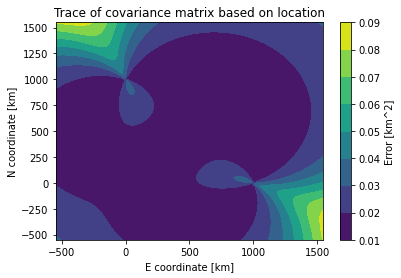

In [25]:
# x1bar = 40 # km E of VOR/DME
# x2bar = 30 # km N of VOR/DME
x1vA = 0 # VOR at origin
x2vA = 0 # VOR at origin
x1vB = 0 # N 
x2vB = 1000 # E
x1vC = 1000 # N
x2vC = 0 # E

# DME locations
loc_A = np.array([x1vA, x2vA]).T # km
loc_B = np.array([x1vB, x2vB]).T # km
loc_C = np.array([x1vC, x2vC]).T # km

# x_bar = np.array([[x1bar, x2bar]]).T # prior knowledge location

sig_x1_2 = 100**2 # prior E variance, assume large since no prior knowledge
sig_x2_2 = 100**2 # prior N variance, assume large since no prior knowledge
P_bar = np.array([[sig_x1_2, 0],
                  [0, sig_x2_2]]) # prior covariance matrix

sig_rho = 0.100 # km
sig_rho_2 = sig_rho ** 2
V = sig_rho_2*np.eye(3)
i,j = 0,0
x1_star = np.arange(-550,1570,20)
x2_star = np.arange(-550,1570,20)
location_grid = np.meshgrid((x1_star, x2_star))
trace_matrix = np.zeros((np.size(x1_star),np.size(x2_star)))

# print(np.shape(trace_matrix))

for j in range(np.size(x2_star)):
  for i in range(np.size(x1_star)):
    # print(x1_star, x2_star)
    rho_A = ((x1_star[i]-x1vA)**2 + (x2_star[j]-x2vA)**2)**0.5 
    rho_B = ((x1_star[i]-x1vB)**2 + (x2_star[j]-x2vB)**2)**0.5 
    rho_C = ((x1_star[i]-x1vC)**2 + (x2_star[j]-x2vC)**2)**0.5 
    h_x_star = np.array([[rho_A, rho_B, rho_C]]).T

    z = h_x_star # assuming measurements at each location increment

    H11 = (x1_star[i]-x1vA)/(((x1_star[i]-x1vA)**2 + (x2_star[j]-x2vA)**2)**0.5)
    H12 = (x2_star[j]-x2vA)/(((x1_star[i]-x1vA)**2 + (x2_star[j]-x2vA)**2)**0.5)
    H21 = (x1_star[i]-x1vB)/(((x1_star[i]-x1vB)**2 + (x2_star[j]-x2vB)**2)**0.5)
    H22 = (x2_star[j]-x2vB)/(((x1_star[i]-x1vB)**2 + (x2_star[j]-x2vB)**2)**0.5)
    H31 = (x1_star[i]-x1vC)/(((x1_star[i]-x1vC)**2 + (x2_star[j]-x2vC)**2)**0.5)
    H32 = (x2_star[j]-x2vC)/(((x1_star[i]-x1vC)**2 + (x2_star[j]-x2vC)**2)**0.5)
    H = np.array([[H11, H12],
                  [H21, H22],
                  [H31, H32]]) # observation matrix

    L = P_bar @ H.T @ np.linalg.inv(H @ P_bar @ (H.T) + V) # Kalman gain

    # z_star = z - h_x_star + (H@x_star)
    # x_hat = x_bar + L @ (z_star - (H @ x_bar))
    P_hat = (np.eye(2) - (L@H)) @ P_bar # posterior covariance = (I-LH)P_hat
    
    trace_matrix[i,j] = np.trace(P_hat)
    
print(trace_matrix)
fig, ax = plt.subplots()
cont = ax.contourf(x1_star, x2_star, trace_matrix)
ax.set_title("Trace of covariance matrix based on location")
ax.set_xlabel("E coordinate [km]")
ax.set_ylabel("N coordinate [km]")
cbar = fig.colorbar(cont)
cbar.ax.set_ylabel('Error [km^2]')

